# Example 6.4

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy.linalg as la
from collections import namedtuple
from IPython.display import Math, display
from matplotlib.patches import Ellipse
from scipy import stats

Samples of sizes $n_{1} = 45$ and $n_{2} = 55$ were taken of Wisconsin
homeowners with and without air conditioning, respectively. (Data courtesy of Statistical
Laboratory, University of Wisconsin.) Two measurements of electrical usage
(in kilowatt hours) were considered. The first is a measure of total on-peak consumption
($X_{1}$) during July, and the second is a measure of total off-peak consumption
( $X_{2}$) during July.

In [2]:
n1 = 45
n2 = 55

In [3]:
xbar1 = np.array([[204.4], [556.6]])
xbar2 = np.array([[130.0], [355.0]])
p = xbar1.shape[0]

In [4]:
S1 = np.array([[13825.3, 23823.4], [23823.4, 73107.4]])
S2 = np.array([[ 8632.0, 19616.7], [19616.7, 55964.5]])

$$
    \textbf{S}_{\text{pooled}}
    =
    \frac{(n_{1} - 1)\textbf{S}_{1} + (n_{2} - 1)\textbf{S}_{2}}{(n_{1} - 1) + (n_{2} - 1)}
$$

In [5]:
S_pooled = ((n1 - 1)*S1 + (n2 - 1)*S2) / ((n1 - 1) + (n2 - 1))
S_pooled

array([[10963.68571429, 21505.42244898],
       [21505.42244898, 63661.3122449 ]])

$$
c^{2}
=
\frac{((n_{1} - 1) + (n_{2} - 1))p}{n_{1} + n_{2} - (p + 1)}
F_{p, n_{1} + n_{2} - (p + 1)}(\alpha)
$$

In [6]:
alpha = 0.05
const = (((n1 - 1) + (n2 - 1))*p) / (n1 + n2 - (p + 1))
f_value = stats.f.ppf(1 - alpha, dfn=p, dfd=n1 + n2 - (p + 1))
c2 = const*f_value
c2

6.244088539488174

$$
    (\bar{\textbf{x}}_{1} - \bar{\textbf{x}}_{2})
    \pm
    c
    \sqrt{
        \left(
            \frac{1}{n_{1}}
            +
            \frac{1}{n_{2}}
        \right)
        \textbf{S}_{\text{pooled}}
        }
$$

In [7]:
ci95 = (xbar1 - xbar2) + np.array([-1, 1]) * np.sqrt(c2) * np.sqrt(((1/n1) + (1/n2))*np.diag(S_pooled)[:, np.newaxis])
ci95

array([[ 21.80733073, 126.99266927],
       [ 74.86845837, 328.33154163]])

In [8]:
# Something to store information about the CI variables.
LabelCI = namedtuple('LabelCI', ['Text', 'Math'])
ci95_labels = [LabelCI(Text='on-peak', Math=r'\mu_{11} - \mu_{21}'),
               LabelCI(Text='off-peak', Math=r'\mu_{12} - \mu_{22}')]

In [9]:
for i in range(ci95.shape[0]):
    display(Math(f'{ci95_labels[i].Math}:'
                 fr'({xbar1[i,0]:.1f} - {xbar2[i,0]:.1f})'
                 fr'\pm \sqrt{{{c2:.2f}}} '
                 fr'\sqrt{{\left(\frac{{1}}{{{n1}}} + \frac{{1}}{{{n2}}}\right) {S_pooled[i,i]:.1f}}}'
                 r'\hspace{0.4cm}\text{or}\hspace{0.4cm}'
                 fr'{ci95[i,0]:.1f} \leq {ci95_labels[i].Math} \leq {ci95[i,1]:.1f}'
                 fr'\hspace{{0.8cm}}(\text{{{ci95_labels[i].Text}}})'
                 ))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [10]:
l, e = la.eigh(S_pooled)
max_idx, min_idx = np.argmax(l), np.argmin(l)
lmbda1, lmbda2 = l[max_idx], l[min_idx]
e1, e2 = e[:, max_idx].copy(), e[:, min_idx].copy()
ell_width = np.sqrt(lmbda1)*np.sqrt((1/n1) + (1/n2))*np.sqrt(const*f_value)
ell_height = np.sqrt(lmbda2)*np.sqrt((1/n1) + (1/n2))*np.sqrt(const*f_value)
ell_angle = np.degrees(np.arctan2(e1[1], e1[0]))

In [11]:
display(Math(r'\sqrt{\lambda_{1}}'
             r'\sqrt{\left(\frac{1}{n_{1}} + \frac{1}{n_{2}}\right) c^{2}} ='
             fr'\sqrt{{{lmbda1:.1f}}}'
             fr'\sqrt{{ \left( \frac{{1}}{{{n1}}} + \frac{{1}}{{{n2}}} \right) {c2:.2f} }} ='
             f'{np.sqrt(lmbda1)*np.sqrt(((1/n1) + (1/n2))*c2):.1f}'
             ))

display(Math(r'\sqrt{\lambda_{2}}'
             r'\sqrt{\left(\frac{1}{n_{1}} + \frac{1}{n_{2}}\right) c^{2}} ='
             fr'\sqrt{{{lmbda2:.1f}}}'
             fr'\sqrt{{ \left( \frac{{1}}{{{n1}}} + \frac{{1}}{{{n2}}} \right) {c2:.2f} }} ='
             f'{np.sqrt(lmbda2)*np.sqrt(((1/n1) + (1/n2))*c2):.1f}'
             ))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

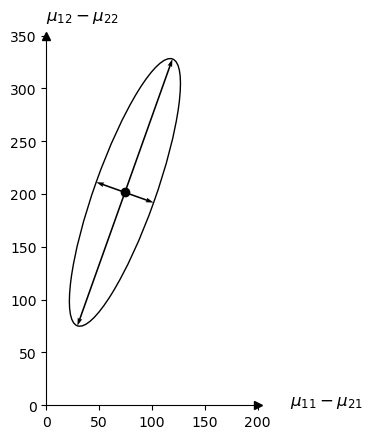

In [12]:
plt.figure()
ax = plt.gca()
xbard = xbar1 - xbar2
ellipse = Ellipse(xy=xbard,
                width=2*ell_width,
                height=2*ell_height,
                angle=ell_angle,
                fill=False)
ax.add_patch(ellipse)
for i in [-1, 1]:
    plt.quiver(xbard[0],
            xbard[1],
            e1[0] * ell_width * i,
            e1[1] * ell_width * i,
            angles='xy',
            scale_units='xy',
            scale=1
            )
    plt.quiver(xbard[0],
            xbard[1],
            e2[0]* ell_height * i,
            e2[1]* ell_height * i,
            angles='xy',
            scale_units='xy',
            scale=1)
ax.set_aspect('equal')

# Set the spines to cross at (0, 0).
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')

# Hide the top and right spines.
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

# Add arrows at the ends of the axes.
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
plt.scatter(xbard[0], xbard[1], color='black')

# Add labels for the axes.
ax.text(300, 0, r'$\mu_{11} - \mu_{21}$', fontsize=12, ha='right')
ax.text(0, 360, r'$\mu_{12} - \mu_{22}$', fontsize=12, va='bottom')

plt.xlim(0,200)
plt.ylim(0, 350)
plt.show()